In [ ]:
import sys
from pathlib import Path

ROOT = Path.cwd().parent          # VisionModelsRepo/
SRC = ROOT / "src"

sys.path.insert(0, str(SRC))

import vision_model_repo as vmr
from vision_model_repo.vision_models.hf_hub import set_hf_content_environment

hf_home_path = "input("Enter the path to the Hugging Face home directory: ")
hf_token = input("Enter the path to the Hugging Face token: ")
set_hf_content_environment(hf_home_path, hf_token)


In [2]:
from vision_model_repo.vision_models.sam3 import Sam3
from vision_model_repo.vision_models.dino3 import DinoV3
from vision_model_repo.vision_models.depth_anything3 import DepthAnythingV3
from vision_model_repo.vision_models.grounding_dino import GroundingDinoInstanceDetection

sam3 = Sam3()
dino3 = DinoV3()
depth_anything3 = DepthAnythingV3()
grounding_dino = GroundingDinoInstanceDetection()

print(sam3)
print(dino3)
print(depth_anything3)
print(grounding_dino)


[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


Loading weights:   0%|          | 0/1468 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/180 [00:00<?, ?it/s]

[INFO ] using MLP layer as FFN


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading weights:   0%|          | 0/1206 [00:00<?, ?it/s]

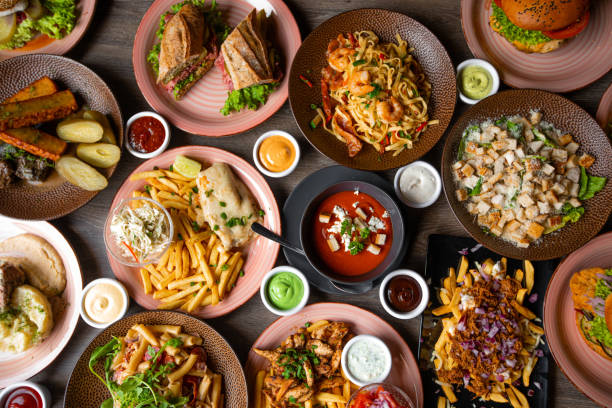

In [3]:
# load image 
import PIL.Image as Image
image_path = "./instance_segmentation_example.jpg"
image = Image.open(image_path)
image

In [4]:
feature_output = dino3([image])

In [5]:
feature_output

BaseModelOutputWithPoolingAndNoAttention(last_hidden_state=tensor([[[-0.2574,  1.1829,  2.1781,  ...,  2.0645,  3.3745,  1.1866],
         [-2.0744,  2.9830,  2.4571,  ..., -0.2284,  1.9588, -0.7799],
         [-1.8603,  1.6801,  2.1145,  ...,  1.7382,  0.7803, -1.5000],
         ...,
         [-0.0816,  3.5699, -0.2004,  ...,  0.5417,  1.6865,  0.9608],
         [-2.3713,  0.5767,  1.6982,  ...,  0.7304,  1.2762,  1.0057],
         [ 1.0572,  3.2239, -0.9696,  ...,  0.2501,  1.3650,  2.3190]]],
       device='cuda:0'), pooler_output=tensor([[-2.5739e-01,  1.1829e+00,  2.1781e+00, -3.3767e-01,  2.7046e-01,
          4.9825e-01,  7.1079e-01, -1.0364e+00,  3.0289e+00,  2.5823e-01,
          8.6465e-01, -3.3797e+00, -4.3314e-01, -1.0616e+00, -2.9306e-01,
          9.6457e-02, -1.4403e+00,  1.9664e+00,  9.8274e-01, -1.7781e+00,
         -8.8362e-01,  2.8050e+00, -2.9094e-01, -1.9256e+00, -3.4097e+00,
          1.9456e+00,  2.5333e+00,  9.4540e-03,  2.0893e-01,  1.0136e+00,
          1.4526

In [6]:
segmentation_output = sam3([image],['sauce'])

In [7]:
segmentation_output

[{'scores': tensor([0.9175, 0.9342, 0.6738, 0.8838, 0.9167, 0.9019, 0.9292, 0.9163, 0.9293,
          0.8676, 0.8728], device='cuda:0'),
  'boxes': tensor([[460.1233,  65.0698, 492.8895, 100.1486],
          [258.1629, 135.4480, 295.7722, 172.5019],
          [ 15.4494,  34.4246,  54.3983,  51.5993],
          [  3.9766, 386.6935,  42.3361, 408.6760],
          [ 83.7884, 281.9034, 125.5616, 323.7814],
          [398.8751, 164.4205, 437.2905, 203.8920],
          [128.3696, 116.1676, 165.6930, 153.1701],
          [386.2883, 275.3855, 421.9755, 312.5099],
          [265.9890, 271.5901, 303.9245, 310.0694],
          [312.3930, 190.7904, 392.5583, 276.7182],
          [346.1048, 337.7122, 389.7200, 382.7730]], device='cuda:0'),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[

In [8]:
depth_output = depth_anything3([image])

[INFO ] Processed Images Done taking 0.015436887741088867 seconds. Shape:  torch.Size([1, 3, 336, 504])
[INFO ] Model Forward Pass Done. Time: 0.317685604095459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017237663269042969 seconds


In [9]:
depth_output

[{'kind': 'depth_anything_v3',
  'units': 'm',
  'index': 0,
  'model': 'depth-anything/da3-base',
  'conf': array([[1.1211814, 1.1454403, 1.1248393, ..., 1.3484383, 1.366014 ,
          1.4728862],
         [1.1271964, 1.106474 , 1.0995576, ..., 1.327843 , 1.3754816,
          1.4068146],
         [1.1173754, 1.1065112, 1.1058999, ..., 1.2587334, 1.2944148,
          1.3589101],
         ...,
         [1.5394633, 1.6285565, 1.5378435, ..., 1.6505675, 1.71001  ,
          2.0558212],
         [1.4564948, 1.5010446, 1.4443871, ..., 1.7044728, 1.7796539,
          2.142977 ],
         [1.4006197, 1.3910322, 1.3706455, ..., 1.721724 , 1.8447003,
          2.1339996]], dtype=float32),
  'depth': array([[1.0069795 , 1.0039964 , 1.004743  , ..., 0.923946  , 0.9287376 ,
          0.9164189 ],
         [1.0061306 , 0.9989047 , 1.0030863 , ..., 0.9171879 , 0.9190638 ,
          0.918062  ],
         [1.0115999 , 1.0064658 , 1.0063175 , ..., 0.9161239 , 0.91852623,
          0.9149776 ],
       

In [11]:
object_detection_output = grounding_dino([image], ["bowl", "plate"])

In [12]:
object_detection_output

  warnings.warn(self.message, FutureWarning)



[{'scores': tensor([0.4041, 0.4681, 0.4059, 0.4599, 0.4141], device='cuda:0'),
  'boxes': tensor([[ 6.2805e+01,  3.0949e+02,  2.4795e+02,  4.0750e+02],
          [ 1.3180e+02, -7.4421e-02,  3.0201e+02,  1.3679e+02],
          [ 5.4297e+02,  2.3147e+02,  6.1178e+02,  4.0738e+02],
          [ 4.6017e+02, -1.8254e-02,  6.1173e+02,  9.2536e+01],
          [ 4.5572e+02,  5.8200e+01,  4.9987e+02,  1.0420e+02]], device='cuda:0'),
  'text_labels': ['plate', 'plate', 'plate', 'plate', 'bowl'],
  'labels': ['plate', 'plate', 'plate', 'plate', 'bowl']}]